In [37]:
import pandas as pd
import matplotlib.pyplot as plt

import re 
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
import string
import spacy
import gensim.corpora as corpora


import gensim
from gensim.utils import simple_preprocess

import wordcloud


In [2]:
tweet_data = pd.read_csv('data/hashtag_donaldtrump.csv', engine = 'python')
tweet_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [3]:
trump_tweet_data = tweet_data

In [4]:
len(trump_tweet_data)

971087

In [5]:
trump_tweet_data.country.value_counts()

United States of America    178897
United Kingdom               34742
United States                34362
Germany                      22618
France                       20683
                             ...  
Florida                          1
Gabon                            1
Northern Mariana Islands         1
England                          1
Samoa                            1
Name: country, Length: 188, dtype: int64

In [6]:
trump_tweet_data.user_name.value_counts()

Revue2presse                   1352
Global News Report             1325
Scott McLeod (he, him, his)     980
t Logan                         964
Hotpage News                    921
                               ... 
Stephen Koranda                   1
debates                           1
biti                              1
kikilala                          1
voktyr 🗯                          1
Name: user_name, Length: 285095, dtype: int64

In [7]:
trump_tweet_data.created_at

0         2020-10-15 00:00:01
1         2020-10-15 00:00:01
2         2020-10-15 00:00:02
3         2020-10-15 00:00:02
4         2020-10-15 00:00:08
                 ...         
971082    2020-11-08 23:59:43
971083    2020-11-08 23:59:48
971084    2020-11-08 23:59:53
971085    2020-11-08 23:59:54
971086    2020-11-08 23:59:55
Name: created_at, Length: 971087, dtype: object

In [8]:
trump_tweet_data.source.value_counts()

Twitter Web App          321067
Twitter for iPhone       274030
Twitter for Android      269274
Twitter for iPad          35333
TweetDeck                 17484
                          ...  
SocialDog for Twitter         1
MacTrackr                     1
Hypefactors A/S               1
Tradecaptainmena              1
RealJudaldButtrump            1
Name: source, Length: 914, dtype: int64

In [59]:
#Keep just tweets from US for now, should help reduce non-english tweets
american_trump = trump_tweet_data[trump_tweet_data['country'] == 'United States of America']
len(american_trump)

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


178897

In [60]:
american_trump.sample().tweet.item()

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'If the American people don’t realize that @realDonaldTrump is the President for everyone, they don’t deserve him. #Trump #Trump2020LandslideVictory #MAGA #AmericaFirst'

In [61]:
american_trump.info()

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 178897 entries, 0 to 971073
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            178897 non-null  object 
 1   tweet_id              178897 non-null  object 
 2   tweet                 178897 non-null  object 
 3   likes                 178897 non-null  object 
 4   retweet_count         178897 non-null  float64
 5   source                178883 non-null  object 
 6   user_id               178897 non-null  object 
 7   user_name             178896 non-null  object 
 8   user_screen_name      178897 non-null  object 
 9   user_description      168966 non-null  object 
 10  user_join_date        178897 non-null  object 
 11  user_followers_count  178897 non-null  object 
 12  user_location         178897 non-null  object 
 13  lat                   178897 non-null  object 
 14  long                  178897 non-null  object 
 15  

In [62]:
def clean_tweet(text):
    #to lowercase
    text = text.lower() 
    #remove brackets 
    text = re.sub(r'\[.*?\]', '', text)
    #remove @username (i.e. @"")
    text = re.sub(r'@\w*', '', text)
    #remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    #remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text

trump_tweets = pd.DataFrame(american_trump.tweet.apply(lambda x: clean_tweet(x)))


    


/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
#n = 6000
#just isolated tweets now, let's take only n of them
#trump_tweets = trump_tweets[:n]
trump_tweets

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet
0,en florida joebiden dice que donaldtrump sol...
2,trump as a student i used to hear for years fo...
4,you get a tie and you get a tie trump ‘s rally...
5,her minutes were over long time ago omarosa ...
7,there won’t be many of them unless you all...
...,...
971061,being a trump you are intimately familiar wit...
971063,have you know decency trump do you know what...
971065,lionz den presents to you \n\n“the white obama...
971068,trump patriots


In [26]:
#lemmatization 
#this step takes a while, maybe figure out how to speed up 
nlp = spacy.load('en_core_web_sm')
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
trump_tweets['tweet'] = trump_tweets.tweet.map(lambda x: lemmatizer(x))
trump_tweets['tweet'] = trump_tweets['tweet'].str.replace('-PRON-', '')



In [64]:
trump_tweets.head()

data = trump_tweets.tweet.values.tolist()

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


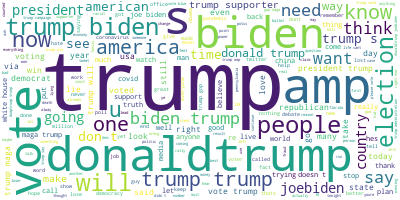

In [65]:

# Import the wordcloud library
from wordcloud import WordCloud

# Join the different tweets 
long_string = ','.join(data)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [66]:
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
data_words[2]

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['get', 'tie', 'get', 'tie', 'trump', 'rally', 'iowa']

In [68]:
#make corpa

# Create Dictionary
id2word = corpora.Dictionary(data_words)

#More pre-procesing, remove extremes 
id2word.filter_extremes(no_below=2, no_above=0.5) 
#filter words that occur in less than 2 docs or more than 50% of the data

# Create Corpus
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]



# View
print(corpus[:1][0][:30])

print('Number of unique tokens (words): %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
Number of unique tokens (words): 44904
Number of documents: 178897


In [69]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics)

# Set training parameters.
#num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None 

model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

# Print the Keyword in the 10 topics
pprint(model.print_topics())
doc_lda = model[corpus]

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.020*"amp" + 0.014*"people" + 0.012*"like" + 0.011*"get" + 0.010*"us" + '
  '0.010*"would" + 0.008*"one" + 0.008*"fraud" + 0.007*"going" + 0.007*"know"'),
 (1,
  '0.030*"trumpmeltdown" + 0.024*"ballots" + 0.020*"georgia" + 0.018*"loser" + '
  '0.018*"bidenharris" + 0.016*"please" + 0.013*"arizona" + 0.012*"voterfraud" '
  '+ 0.010*"nevada" + 0.007*"total"'),
 (2,
  '0.015*"twitter" + 0.011*"yourefired" + 0.009*"new" + 0.009*"care" + '
  '0.009*"amp" + 0.009*"pa" + 0.008*"black" + 0.007*"power" + 0.007*"read" + '
  '0.007*"steal"'),
 (3,
  '0.053*"biden" + 0.035*"donaldtrump" + 0.025*"election" + 0.019*"president" '
  '+ 0.017*"vote" + 0.014*"votes" + 0.013*"joebiden" + 0.012*"america" + '
  '0.012*"maga" + 0.009*"supporters"'),
 (4,
  '0.036*"de" + 0.020*"la" + 0.016*"que" + 0.015*"en" + 0.013*"el" + '
  '0.012*"concede" + 0.011*"blue" + 0.010*"trumpout" + 0.007*"los" + '
  '0.007*"winner"')]


In [70]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average topic coherence: -6.5482.
[([(0.019710891, 'amp'),
   (0.01436701, 'people'),
   (0.0119635835, 'like'),
   (0.010829844, 'get'),
   (0.009815663, 'us'),
   (0.009553922, 'would'),
   (0.008454267, 'one'),
   (0.0077300584, 'fraud'),
   (0.0070341444, 'going'),
   (0.0068820766, 'know'),
   (0.0063373796, 'trumps'),
   (0.006153849, 'still'),
   (0.006133132, 'never'),
   (0.0061155735, 'go'),
   (0.0060830703, 'country'),
   (0.0059564426, 'white'),
   (0.0056937817, 'see'),
   (0.0054467735, 'think'),
   (0.005432899, 'lost'),
   (0.0053839413, 'dont')],
  -3.3629416451765146),
 ([(0.05251616, 'biden'),
   (0.03486771, 'donaldtrump'),
   (0.024513071, 'election'),
   (0.019246507, 'president'),
   (0.016853174, 'vote'),
   (0.014154832, 'votes'),
   (0.012718302, 'joebiden'),
   (0.012166913, 'america'),
   (0.011705383, 'maga'),
   (0.008876291, 'supporters'),
   (0.008334629, 'voted'),
   (0.0069658104, 'win'),
   (0.0069241845, 'years'),
   (0.0067932224, 'gop'),
   (0.006

In [71]:
#VIZ
lda_model = model
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.347733  0.157159       1        1  39.620348
3      0.125166 -0.350145       2        1  34.699077
2     -0.077426  0.234327       3        1   9.068137
1     -0.203495  0.053552       4        1   8.873475
4     -0.191978 -0.094893       5        1   7.738963, topic_info=              Term          Freq         Total Category  logprob  loglift
196          biden  39886.000000  39886.000000  Default  30.0000  30.0000
6      donaldtrump  26757.000000  26757.000000  Default  29.0000  29.0000
83        election  18429.000000  18429.000000  Default  28.0000  28.0000
3               de   6063.000000   6063.000000  Default  27.0000  27.0000
66       president  14470.000000  14470.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
3176           del    585.462116    586.323896   Topic5  -5.6574   2.5574
4116        county    599.341443    600.230385   Topic5  -5.6339   2.5574
11284       philly    555.717087    556.617045   Topic5  -5.7095   2.5573
4356   investigate    552.945875    553.856746   Topic5  -5.7145   2.5573
13829        codes    561.715095    562.846489   Topic5  -5.6988   2.5569

[197 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
4009       3  0.999347           accept
93         2  0.999922          america
525        1  0.999689        americans
139        1  0.906005              amp
139        3  0.093974              amp
...      ...       ...              ...
3909       4  0.998521             yall
38         1  0.058755            years
38         2  0.940985            years
11251      3  0.999492       yourefired
37767      3  0.998719  yourefiredtrump

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

In [12]:
import tqdm
n = 1000000000000000
for i in tqdm.tqdm(range(100000)):
    x = (n**i)**i

  0%|          | 268/100000 [00:16<1:40:52, 16.48it/s]


KeyboardInterrupt: 